# Import the libraries

In [76]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [77]:
# Loading dataframe
df = pd.read_csv("C:/Users/kasoju/Desktop/KASOJU/PGDSBA/Supervised/decision tree/Loan_Modelling.csv")

In [78]:
# checking for top 5 rows
df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [79]:
#checking for last five rows
df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [80]:
# Check the shape of the dataset to know no of rows and columns
df.shape

(5000, 14)

* Dataset contains 5000 rows and 14 columns

In [81]:
#checking for missing values
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* Now we understand that our data doesn't have any missing values.

In [82]:
# checking dataframe info like data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [83]:
#chec king descriptive statistics of the data
df.describe()

ID          Age   Experience       Income       ZIPCode  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [84]:
loan = df.copy()

In [85]:
loan.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [86]:
#removing ID column from the dataset
loan.pop('ID')

0          1
1          2
2          3
3          4
4          5
        ... 
4995    4996
4996    4997
4997    4998
4998    4999
4999    5000
Name: ID, Length: 5000, dtype: int64

In [87]:
loan.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [88]:
# Checking the value counts to confirm the data
print(loan.Income.value_counts())
print(loan.ZIPCode.value_counts())
print(loan.Family.value_counts())
print(loan.CCAvg.value_counts())
print(loan.Education.value_counts())
print(loan.Mortgage.value_counts())
print(loan.Personal_Loan.value_counts())
print(loan.Securities_Account.value_counts())
print(loan.CD_Account.value_counts())
print(loan.Online.value_counts())
print(loan.CreditCard.value_counts())


44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
92694      1
94404      1
94598      1
94965      1
Name: ZIPCode, Length: 467, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64
0    4520
1     480
Name: Personal_Loan, dtype: int64
0    4478
1     522
Name: Securities_Account, dtype: int64
0    4698
1     302
Name: CD_Account, dtype: int64
1    2984
0    2016
Name: Onli

# Univariate Analysis

In [89]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

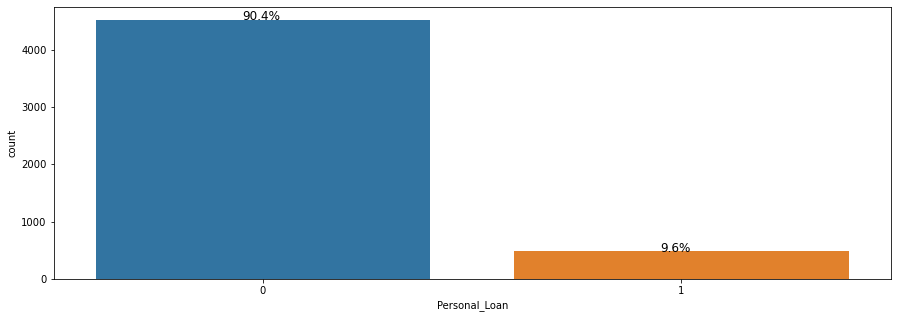

In [90]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Personal_Loan"])
perc_on_bar(ax,loan["Personal_Loan"])

* As per the given dataset, 90.4% of the customers not accepted personal loan where only 9.6% people have personal loans

(array([262., 487., 632., 479., 532., 600., 524., 678., 504., 302.]),
 array([23. , 27.4, 31.8, 36.2, 40.6, 45. , 49.4, 53.8, 58.2, 62.6, 67. ]),
 <a list of 10 Patch objects>)

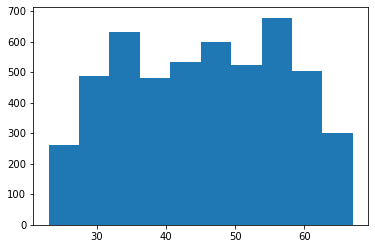

In [91]:
plt.hist(loan['Age'])

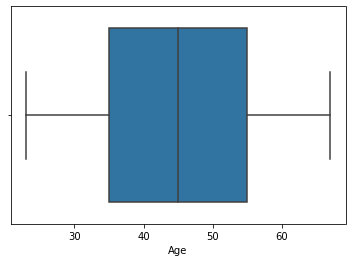

In [92]:
sns.boxplot(loan['Age'])

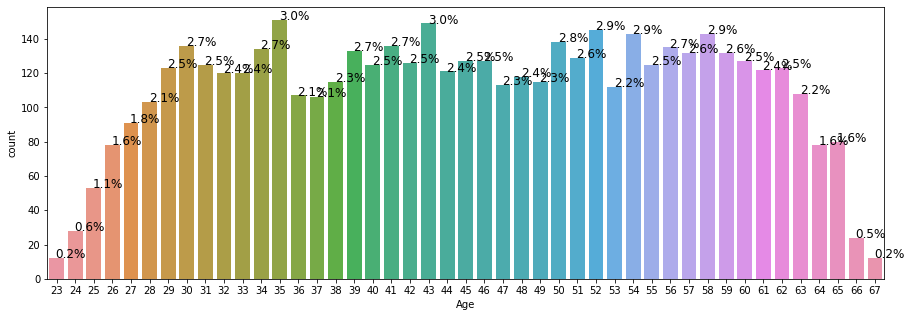

In [93]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Age"])
perc_on_bar(ax,loan["Age"])

In [94]:
def ordered_unique_values(df, var):
    """
    Given a pandas dataframe, return unique column values in descending order of frequency count
    """
    df_copy = df[[var]].copy()
    df_copy['count'] = 1
    df_copy = df_copy.groupby([var], as_index = False).agg({'count' : 'sum'}).sort_values('count', ascending = False)
    return list(df_copy[var])


def overlapping_hist(df, cont_var, categ_var, figsize = (20,10), alpha = 0.7):
    """
    Plot overlapping histograms - each representing some categorical value in a dataframe
    """
    unique_categ = ordered_unique_values(df = df, var = categ_var)
    plt.figure(figsize = figsize)
    for cv in unique_categ:
        plt.hist(cont_var, data = df[df[categ_var] == cv], alpha = alpha, label  = cv)
    plt.xlabel(cont_var)
    plt.legend(fontsize=25)
    plt.show()
    
def categ_eda_plot_loop(df, cont_var, categ_vars, alpha = 0.5):
    for cv in categ_vars:
        plt.figure()
        overlapping_hist(df = df, cont_var = cont_var, categ_var = cv, alpha = alpha)
        plt.show()

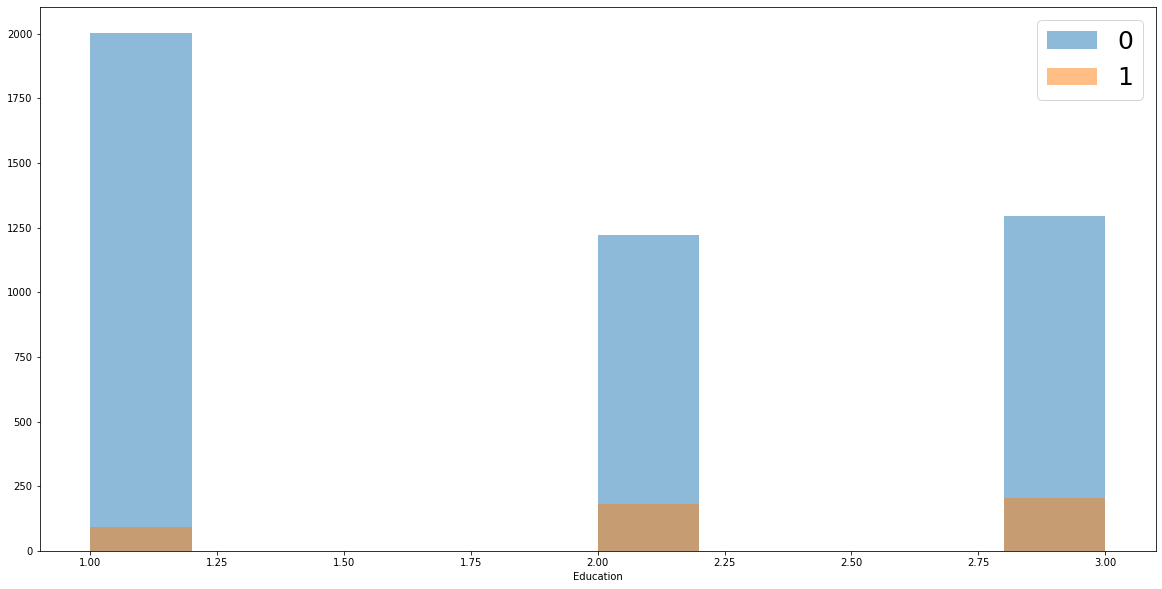

In [95]:
overlapping_hist(df = loan, cont_var = 'Education', categ_var = 'Personal_Loan', alpha = 0.5)

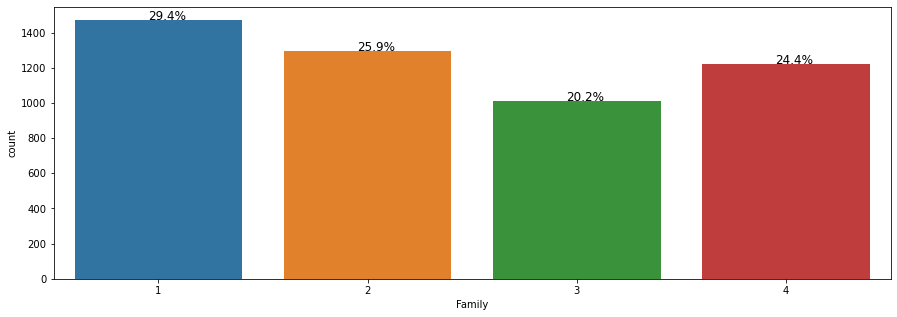

In [96]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Family"])
perc_on_bar(ax,loan["Family"])

* the highest percentage of data is of family size 1 where least is family size 3

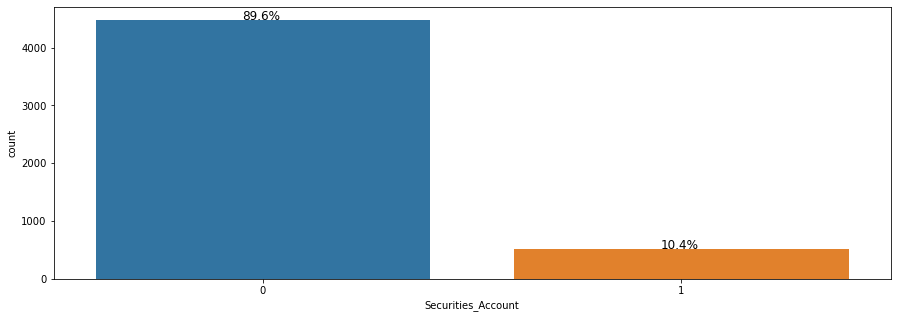

In [97]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Securities_Account"])
perc_on_bar(ax,loan["Securities_Account"])

* Only 10% of customers data is having securities account

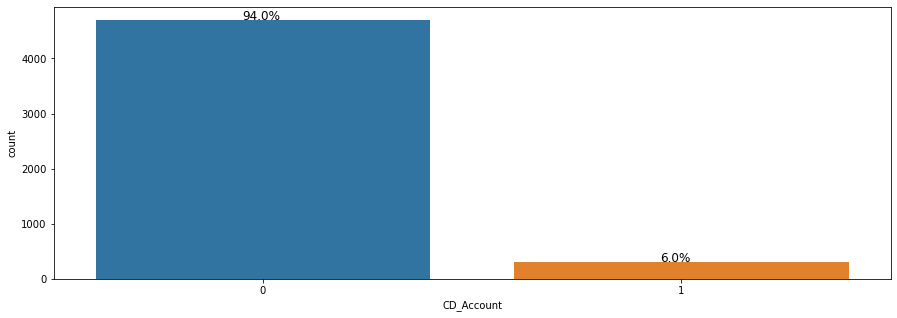

In [98]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["CD_Account"])
perc_on_bar(ax,loan["CD_Account"])

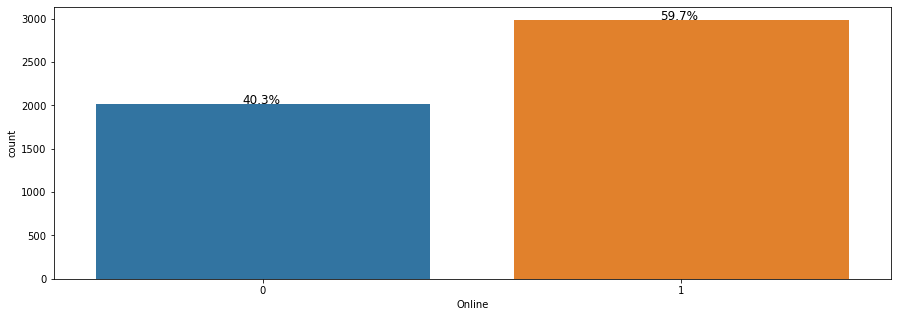

In [99]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Online"])
perc_on_bar(ax,loan["Online"])

* 59.7% of customers having online account

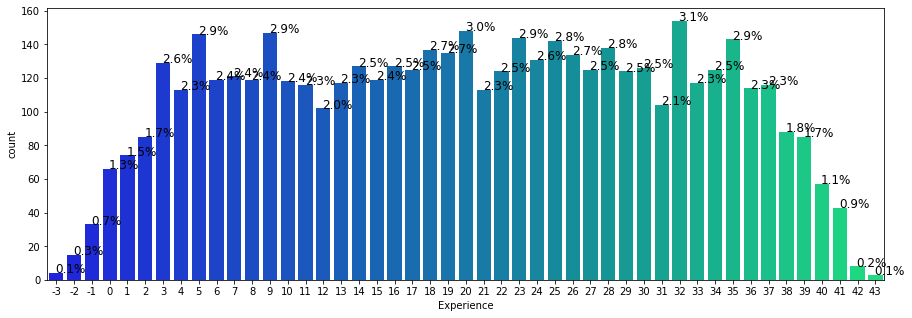

In [100]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["Experience"],palette='winter')
perc_on_bar(ax,loan["Experience"])

(array([3530.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1470.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

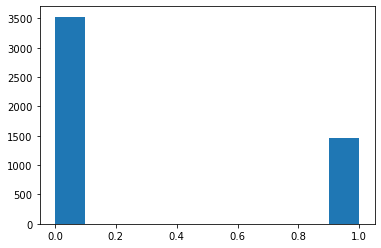

In [101]:
plt.hist(loan['CreditCard'])

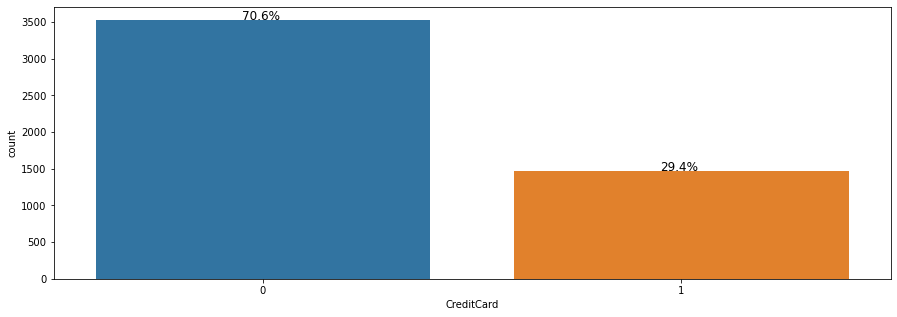

In [102]:
plt.figure(figsize=(15,5))
ax = sns.countplot(loan["CreditCard"])
perc_on_bar(ax,loan["CreditCard"])

* Almost 2/3 of customers don't use the crediot card issued by universal bank

(array([ 802., 1153.,  867.,  879.,  377.,  307.,  268.,  197.,  141.,
           9.]),
 array([  8. ,  29.6,  51.2,  72.8,  94.4, 116. , 137.6, 159.2, 180.8,
        202.4, 224. ]),
 <a list of 10 Patch objects>)

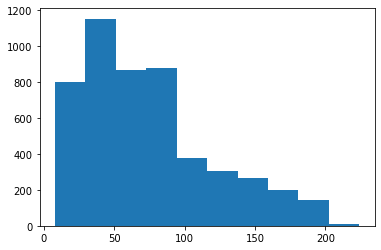

In [103]:
plt.hist(loan['Income'])

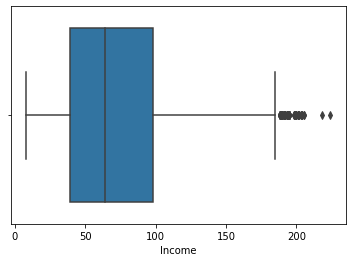

In [104]:
sns.boxplot(loan['Income'])

# Bi Variate Analysis

In [105]:
loan.corr()

Age  Experience    Income   ZIPCode    Family  \
Age                 1.000000    0.994215 -0.055269 -0.030530 -0.046418   
Experience          0.994215    1.000000 -0.046574 -0.030456 -0.052563   
Income             -0.055269   -0.046574  1.000000 -0.030709 -0.157501   
ZIPCode            -0.030530   -0.030456 -0.030709  1.000000  0.027512   
Family             -0.046418   -0.052563 -0.157501  0.027512  1.000000   
CCAvg              -0.052012   -0.050077  0.645984 -0.012188 -0.109275   
Education           0.041334    0.013152 -0.187524 -0.008266  0.064929   
Mortgage           -0.012539   -0.010582  0.206806  0.003614 -0.020445   
Personal_Loan      -0.007726   -0.007413  0.502462 -0.002974  0.061367   
Securities_Account -0.000436   -0.001232 -0.002616  0.002422  0.019994   
CD_Account          0.008043    0.010353  0.169738  0.021671  0.014110   
Online              0.013702    0.013898  0.014206  0.028317  0.010354   
CreditCard          0.007681    0.008967 -0.002385  0.024033  0.011588   

                       CCAvg  Education  Mortgage  Personal_Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.050077   0.013152 -0.010582      -0.007413   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIPCode            -0.012188  -0.008266  0.003614      -0.002974   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.002422    0.021671  0.028317    0.024033  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

In [107]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

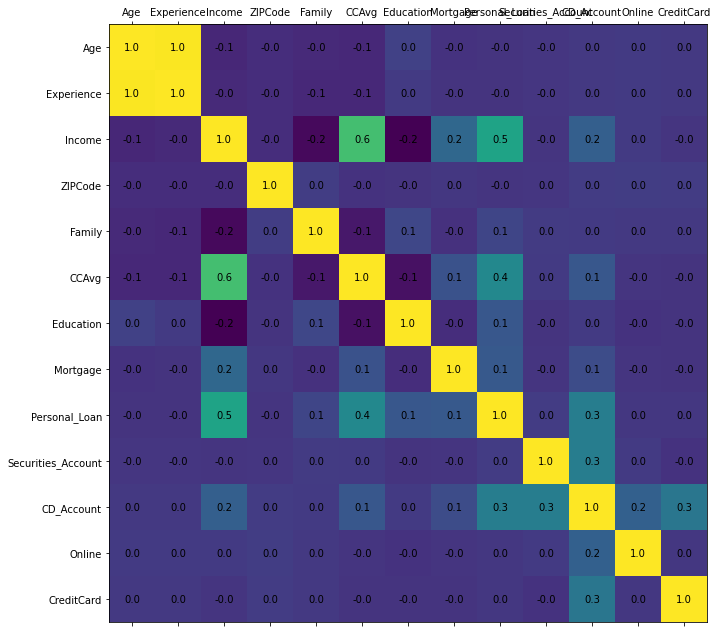

In [108]:
plot_corr(loan)

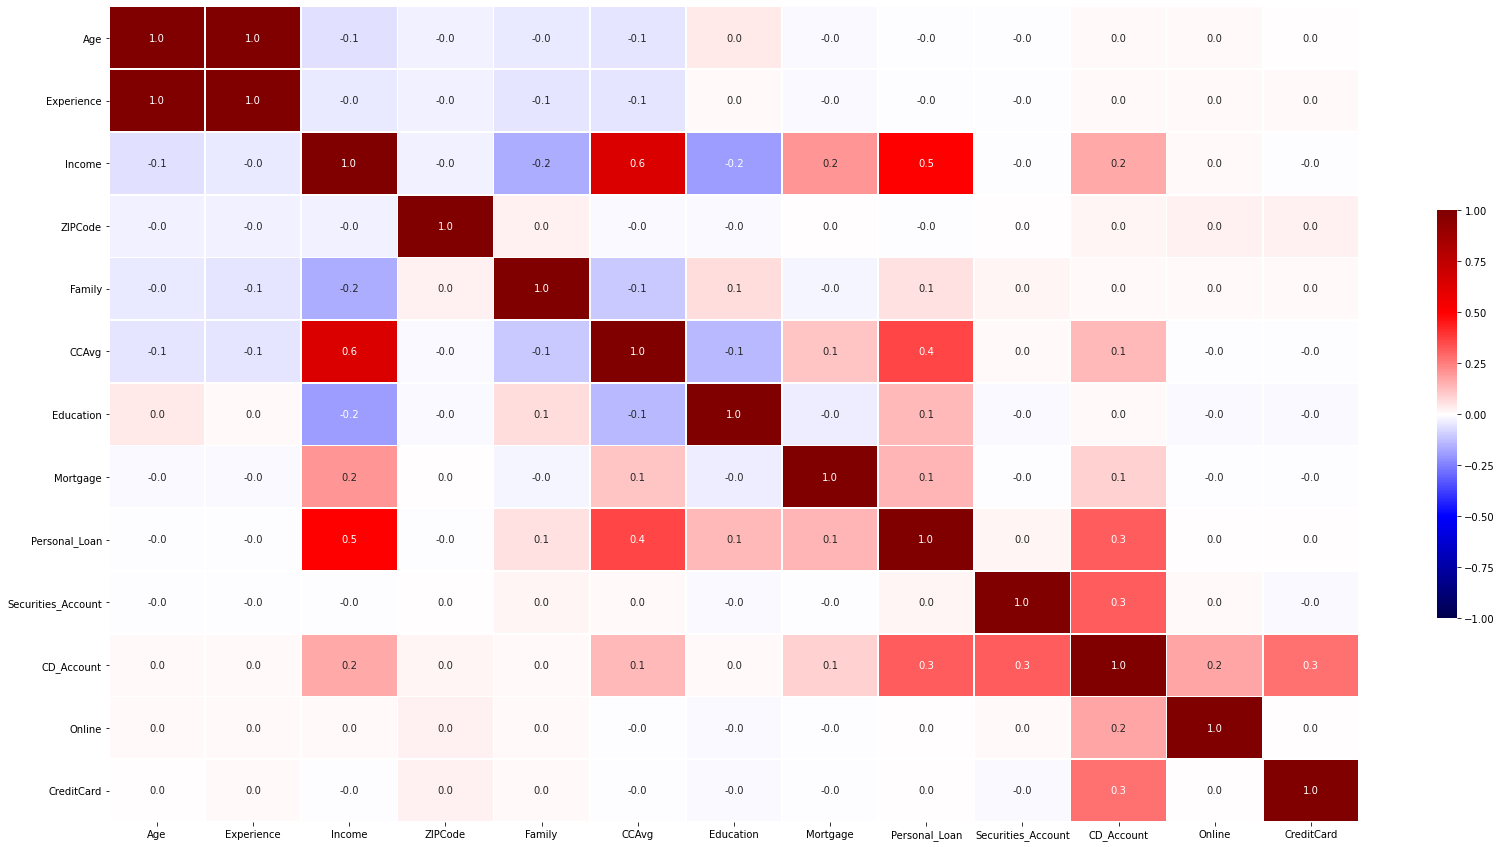

In [109]:
numeric_columns = loan.select_dtypes(include=np.number).columns.tolist()
corr = loan[numeric_columns].corr() 


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

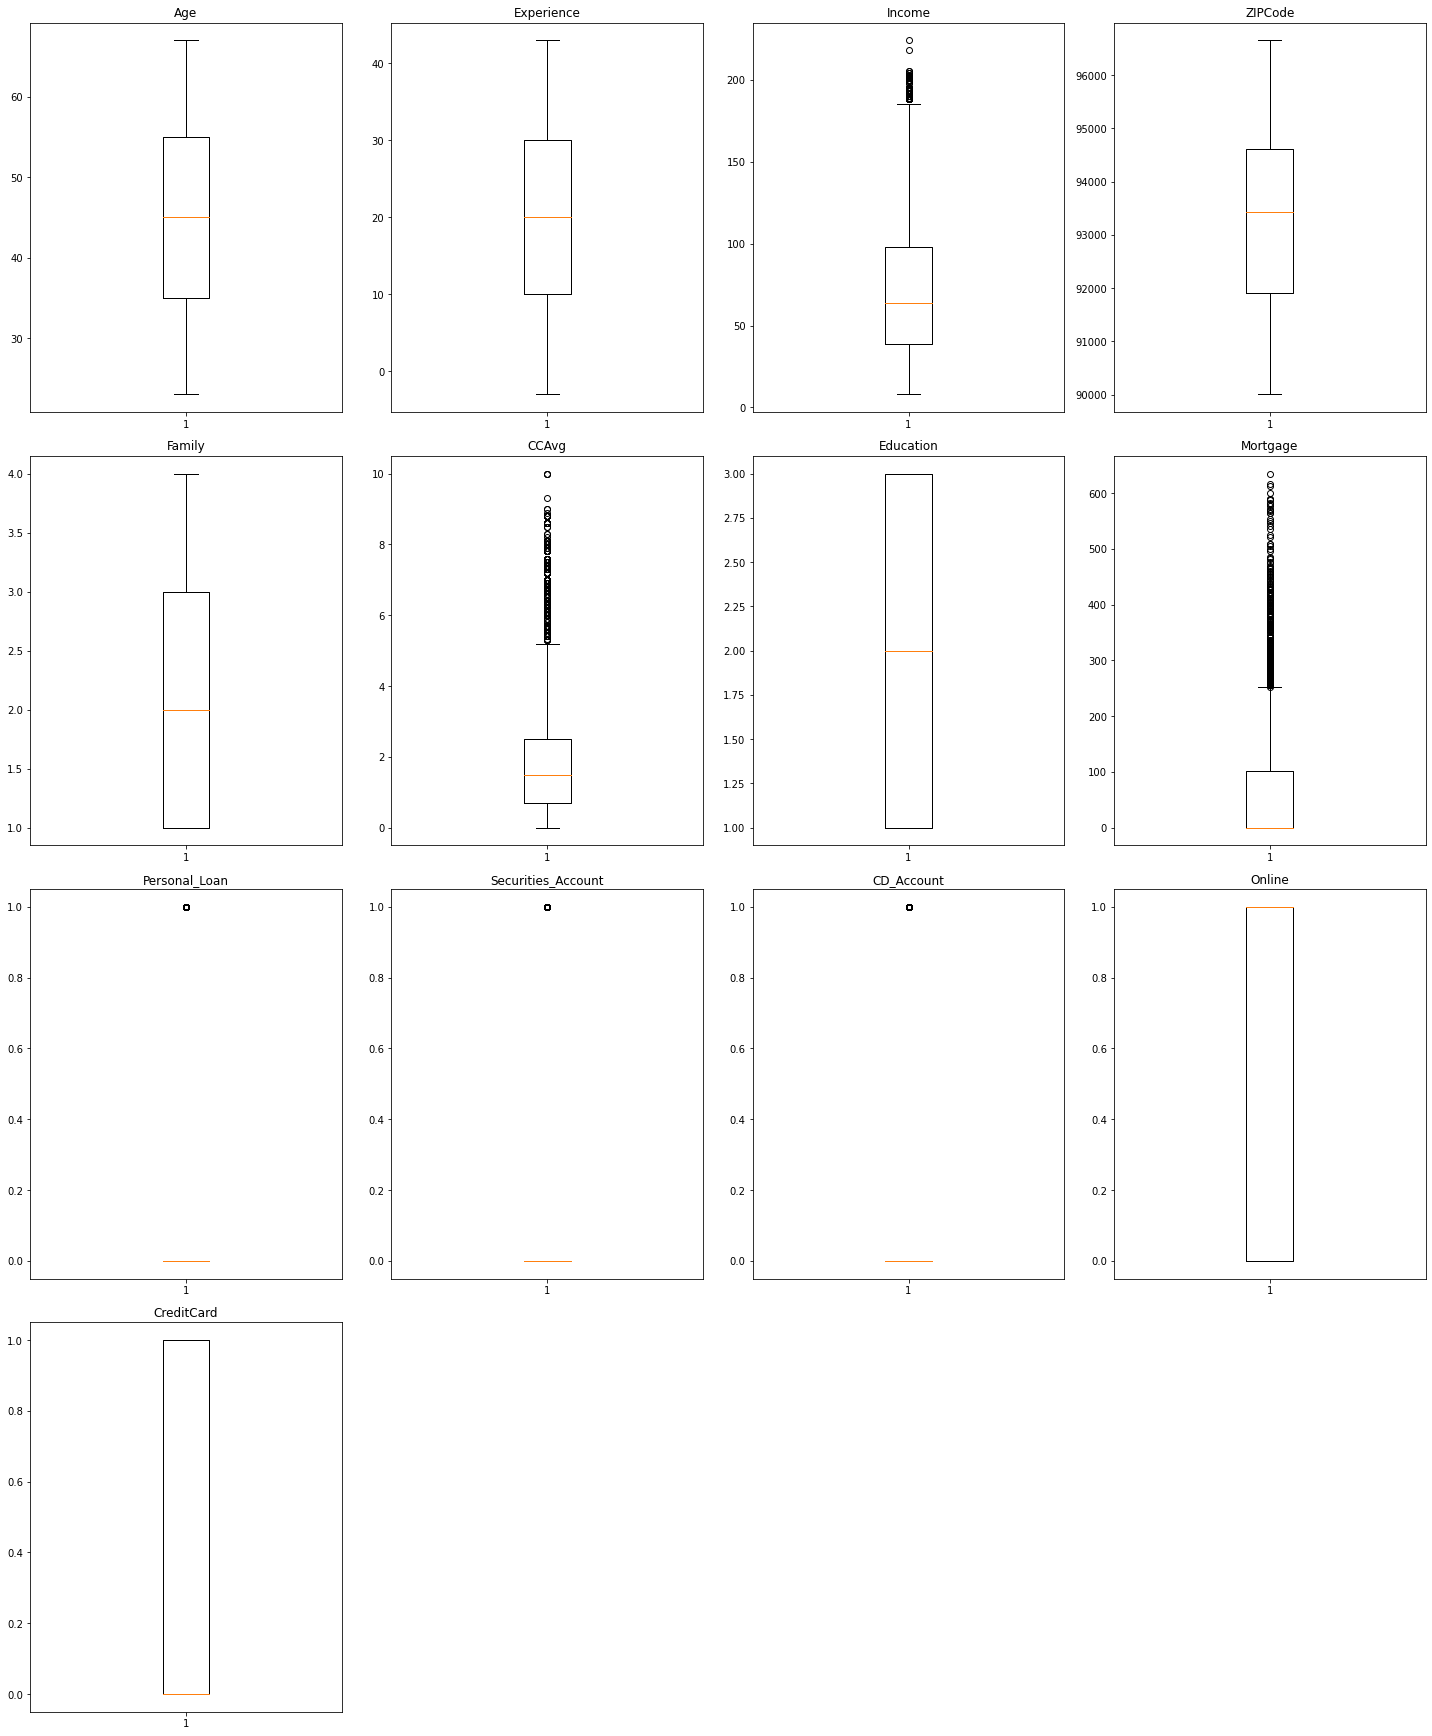

In [110]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

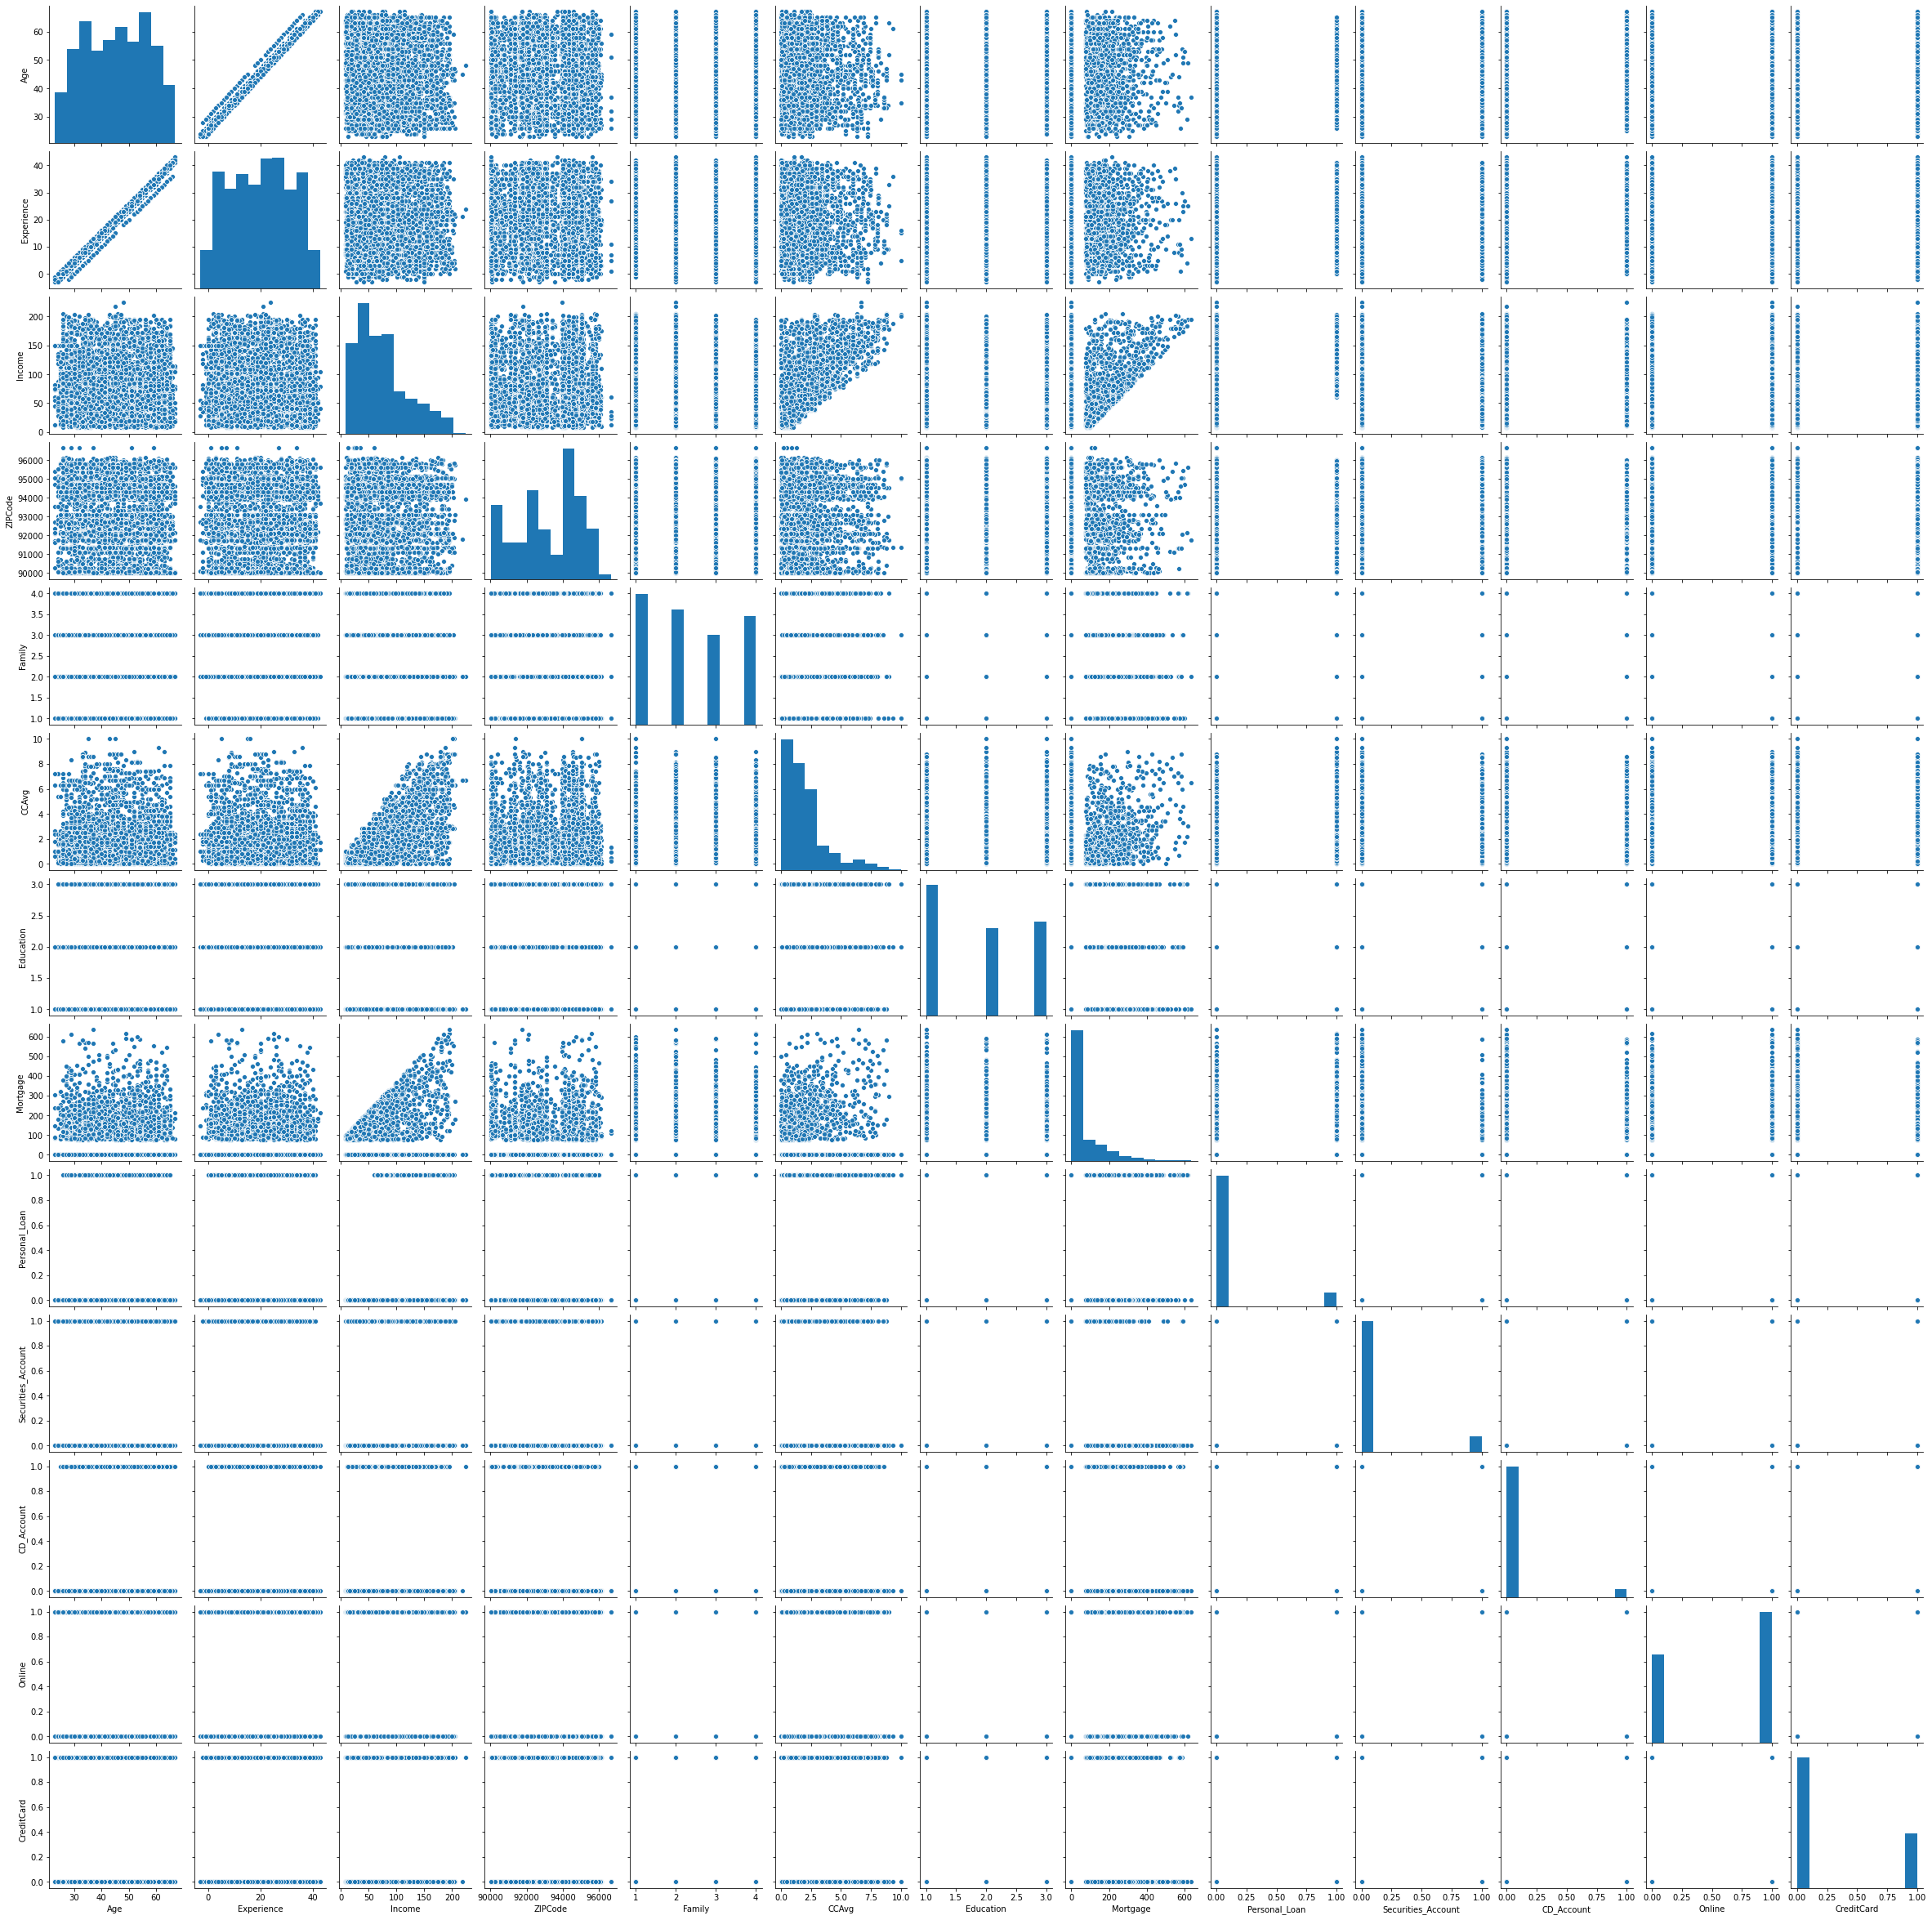

In [111]:
sns.pairplot(loan)

### Income Vs Age Vs Personal Loan

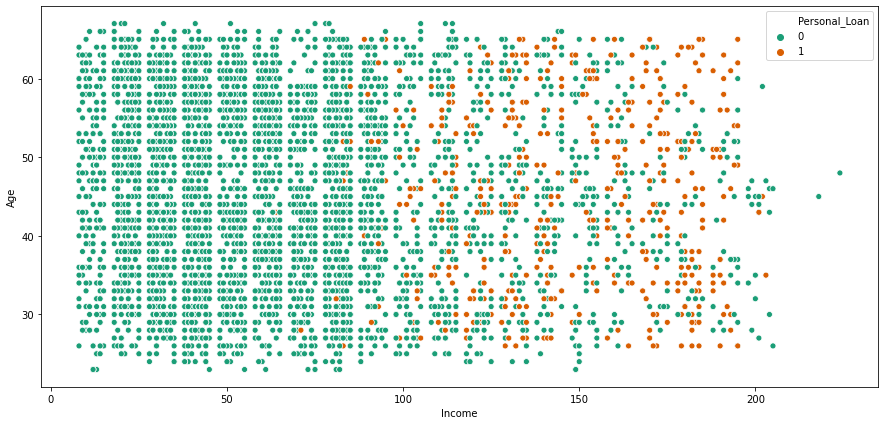

In [113]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["Income"],loan["Age"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Above scatterplot shows customers with above 100k income have personal loans

### Experience Vs Age Vs Personal Loan

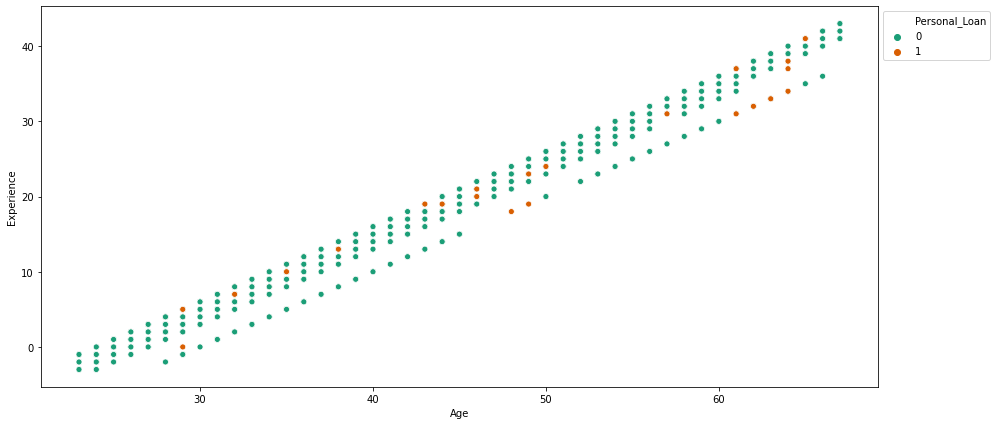

In [114]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["Age"],loan["Experience"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* People with above 40 years and with more than 10 years experience accepted personal loans.

### Mortgage Vs Income Vs Personal Loan

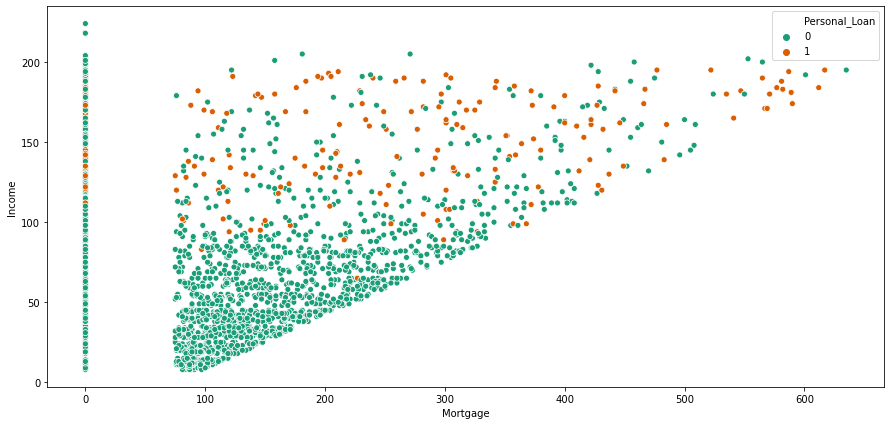

In [115]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["Mortgage"],loan["Income"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers with above 100k income and mortgage are more likely taking personal loans

### Education Vs Income Vs Personal Loan

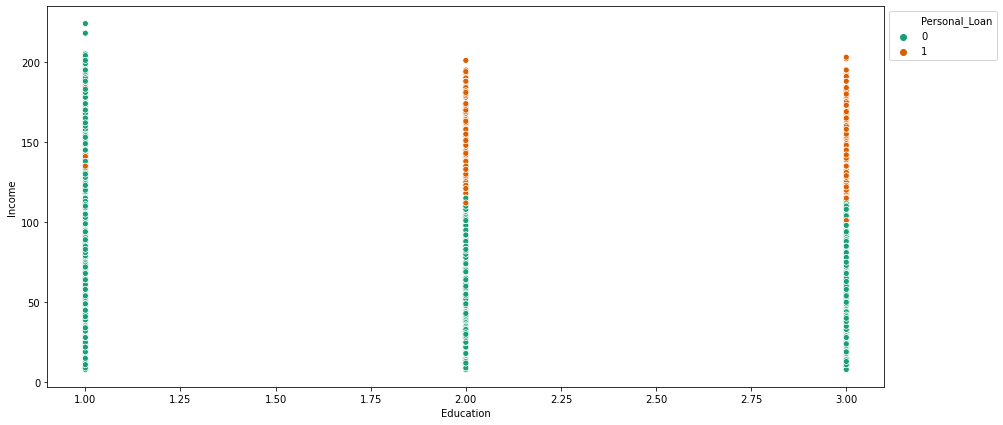

In [116]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["Education"],loan["Income"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers who have graduate and advanced/propfessional education and having income above 100k are having personal loans

### Age vs Mortgage vs Personal_Loan

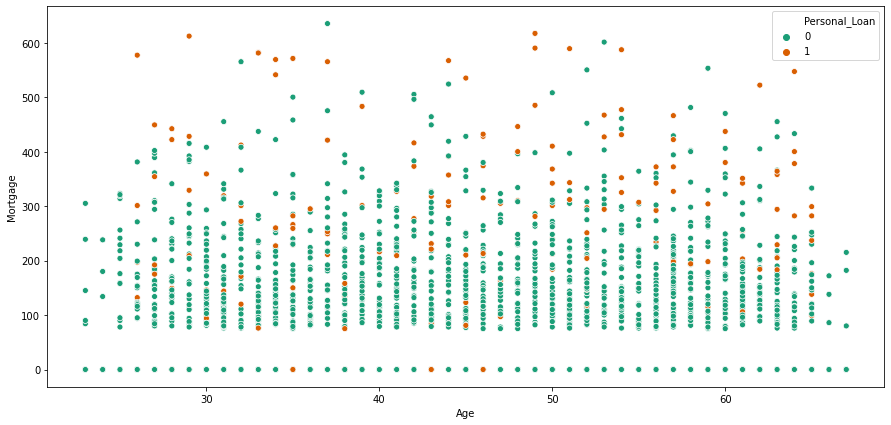

In [117]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["Age"],loan["Mortgage"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers with more than 200k mortgage is having more personal loans

### CCAvg vs Age vs Personal Loan

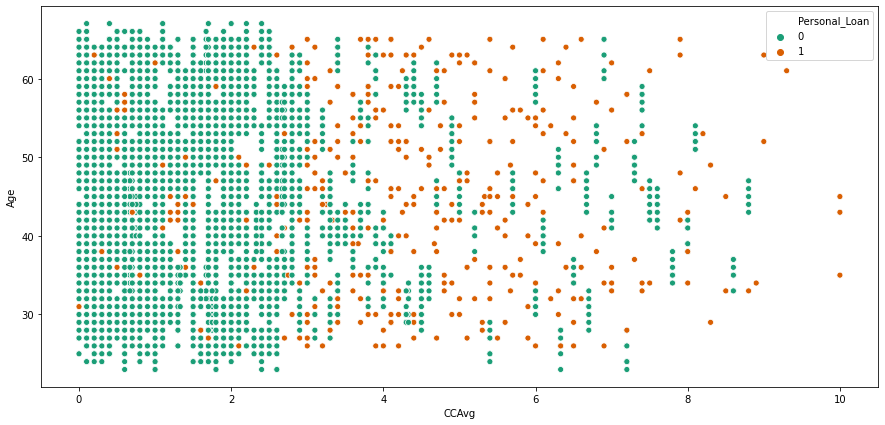

In [118]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["CCAvg"],loan["Age"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers who spend more than 3k on credit cards are more likely to lend personal loans

### CCAvg vs Family vs Personal Loan

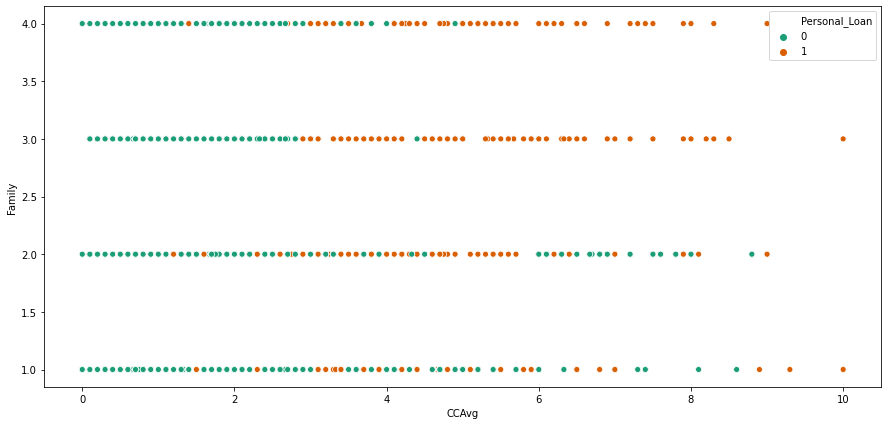

In [119]:
plt.figure(figsize=(15,7))
sns.scatterplot(loan["CCAvg"],loan["Family"],hue=loan["Personal_Loan"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers with family size 3 & 4 and who are using more than 5k CCavg are more depending on personal loans

# Split the data

In [120]:
loan.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

# LOGISTIC

In [121]:
from sklearn.model_selection import train_test_split

X = loan.drop('Personal_Loan', axis =1)    
Y = loan['Personal_Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
1334   47          22      35    94304       2    1.3          1         0   
4768   38          14      39    93118       1    2.0          2         0   
65     59          35     131    91360       1    3.8          1         0   
177    29           3      65    94132       4    1.8          2       244   
4489   39          13      21    95518       3    0.2          2         0   

      Securities_Account  CD_Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0

In [122]:
y_train.head()

1334    0
4768    0
65      0
177     0
4489    0
Name: Personal_Loan, dtype: int64

In [123]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [124]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal_Loan'] == 1]), (len(loan.loc[loan['Personal_Loan'] == 1])/len(loan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(loan.loc[loan['Personal_Loan'] == 0]), (len(loan.loc[loan['Personal_Loan'] == 0])/len(loan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



In [125]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3        4         5         6  \
0  0.001235 -0.00132  0.036132 -0.000067  0.01521  0.009387  0.016434   

          7         8         9        10        11  intercept  
0  0.000833  0.000529  0.004639 -0.000131 -0.000022  -0.000063  


In [126]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9073333333333333


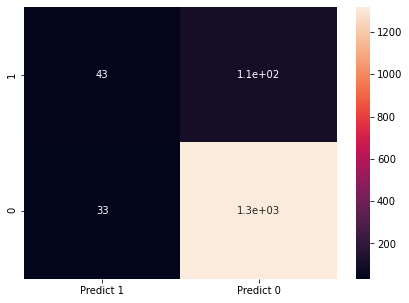

In [127]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

* With the Logistic regression we have seen our model accuracy is at 90% 

# Decision Tree

In [128]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [129]:
print("Accuracy on training set : ",dTree.score(x_train, y_train))
print("Accuracy on test set : ",dTree.score(x_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.98


In [130]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(x_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [131]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

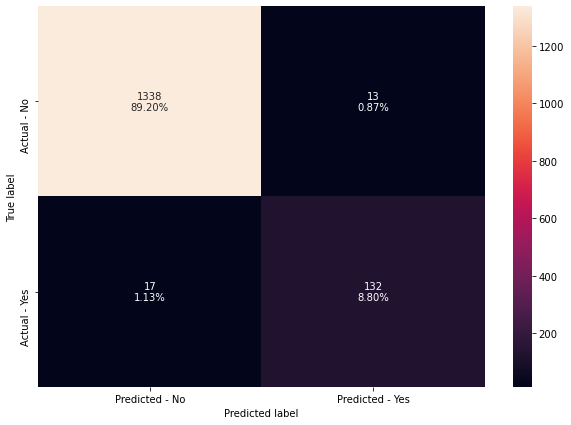

In [132]:
make_confusion_matrix(dTree,y_test)

In [133]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8859060402684564


In [134]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


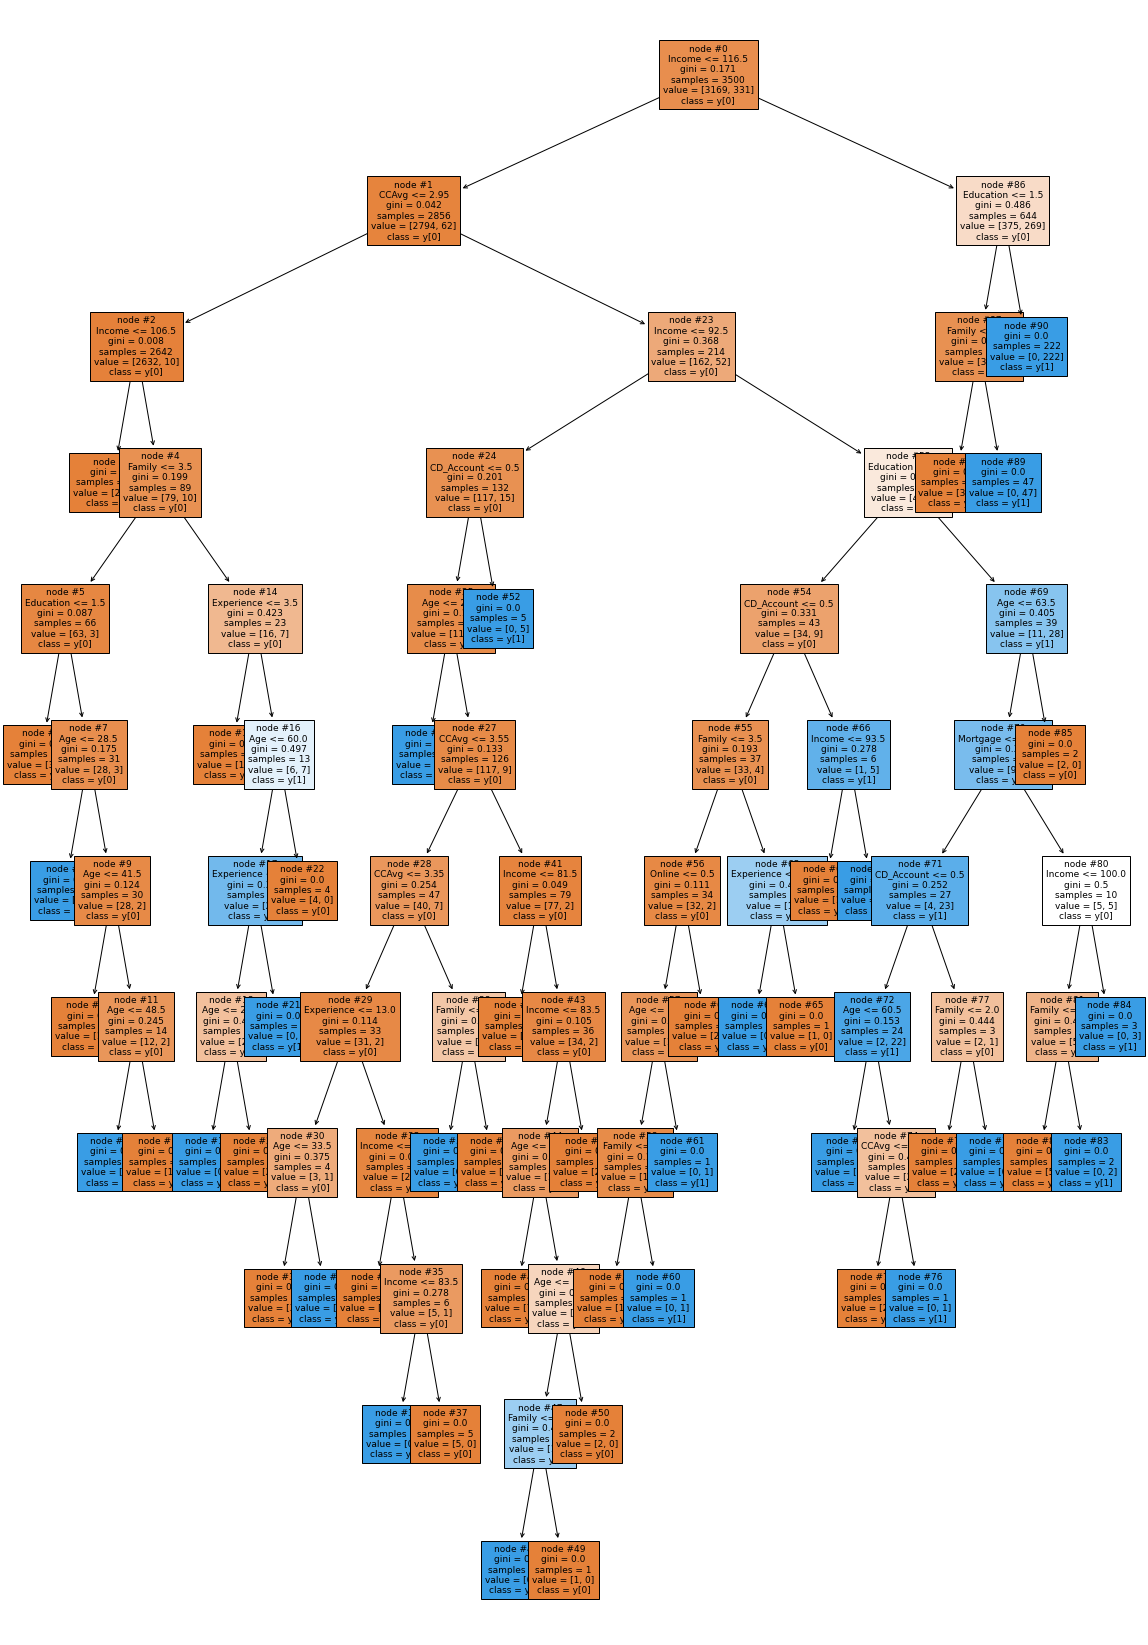

In [135]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [136]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.401465
Income              0.308336
Family              0.169593
CCAvg               0.044408
Age                 0.035708
CD_Account          0.025711
Experience          0.011203
Mortgage            0.003014
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


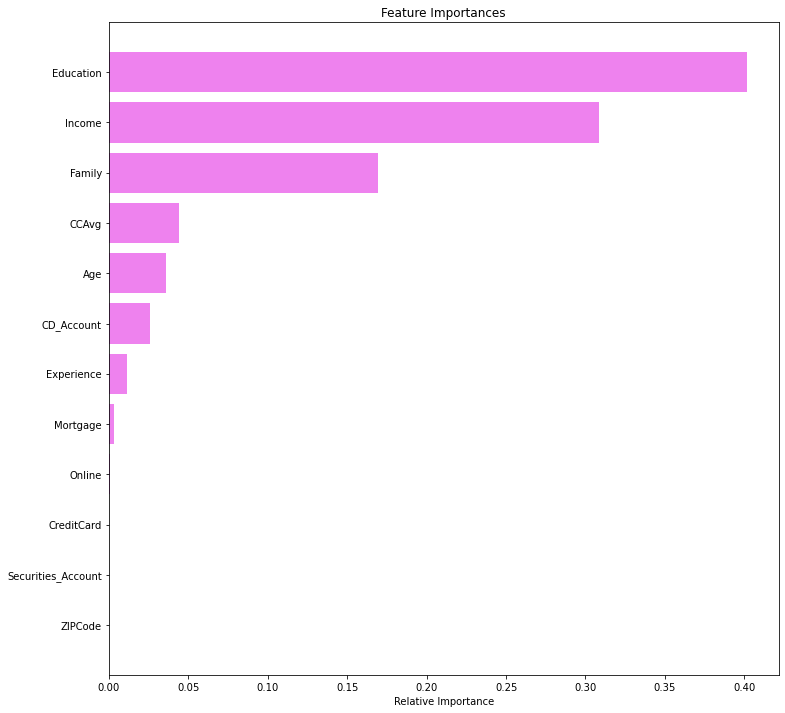

In [137]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [138]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

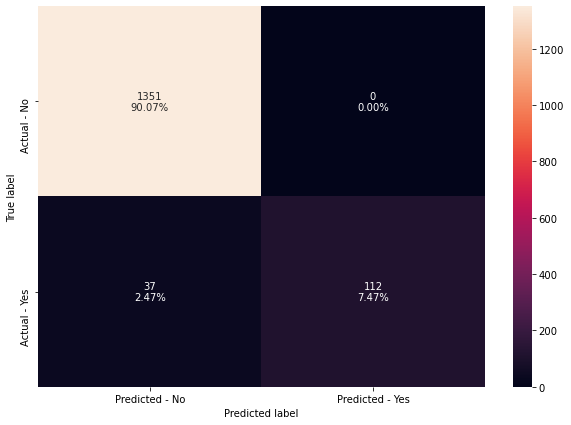

In [139]:
make_confusion_matrix(dTree1, y_test)

In [140]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


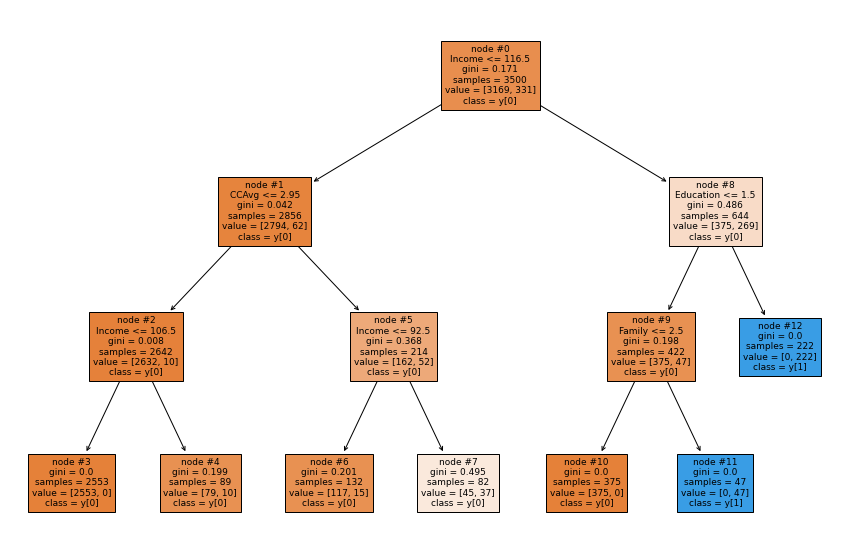

In [141]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [142]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.446593
Income              0.346997
Family              0.162372
CCAvg               0.044038
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


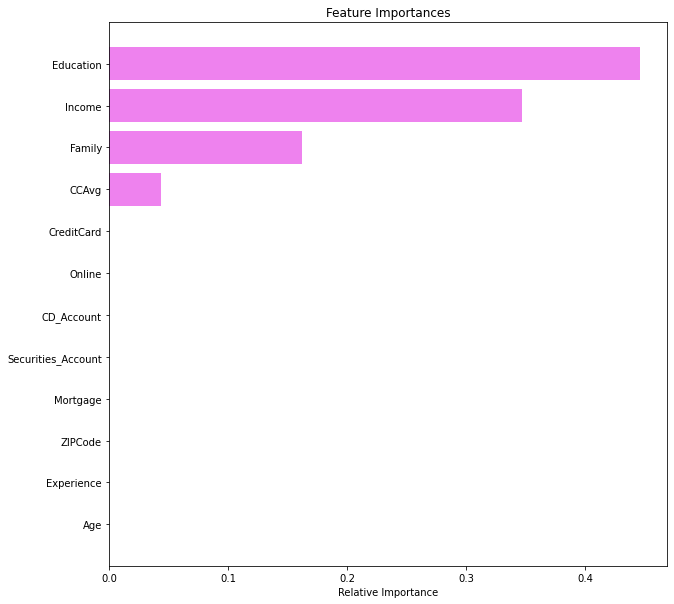

In [143]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Using GridSearch for Hyperparameter tuning of our tree model

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

### Confusion Matrix - decision tree with tuned hyperparameters

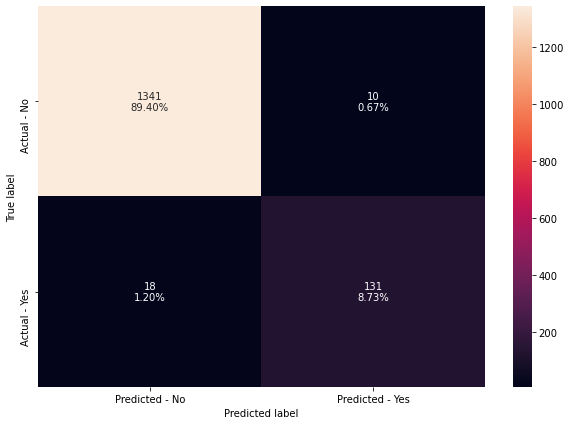

In [146]:
make_confusion_matrix(estimator,y_test)

In [147]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


### Visualizing the Decision Tree

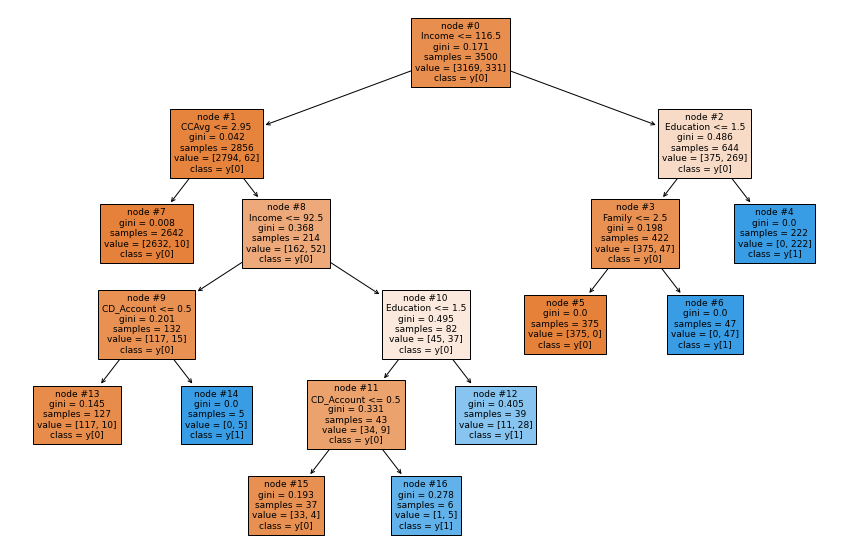

In [148]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [149]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                         Imp
Education           0.447999
Income              0.328713
Family              0.155711
CCAvg               0.042231
CD_Account          0.025345
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


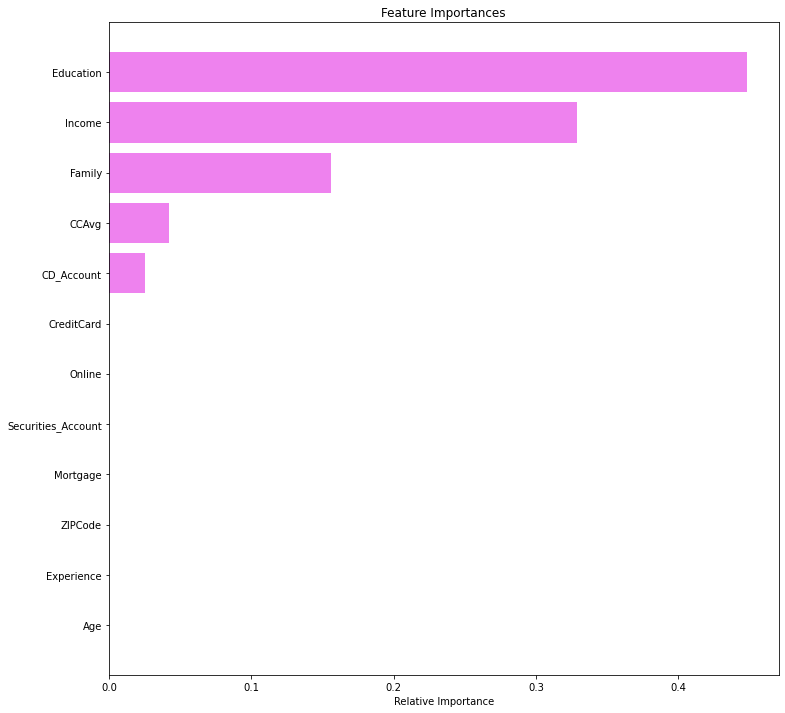

In [150]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning

In [151]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [152]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000223    0.001114
2     0.000268    0.002188
3     0.000359    0.003263
4     0.000381    0.003644
5     0.000381    0.004025
6     0.000381    0.004406
7     0.000381    0.004787
8     0.000409    0.006423
9     0.000476    0.006900
10    0.000508    0.007407
11    0.000582    0.007989
12    0.000593    0.009175
13    0.000641    0.011740
14    0.000769    0.014817
15    0.000792    0.017985
16    0.001552    0.019536
17    0.002333    0.021869
18    0.003024    0.024893
19    0.003294    0.028187
20    0.006473    0.034659
21    0.023866    0.058525
22    0.056365    0.171255

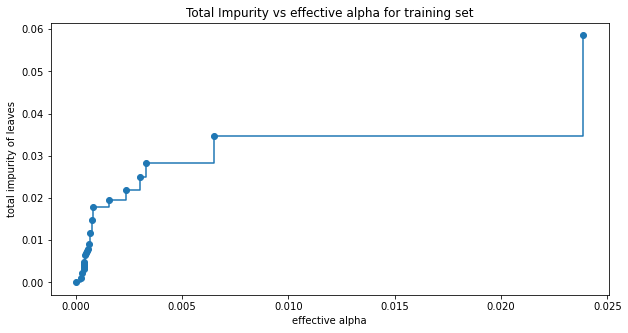

In [153]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [154]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


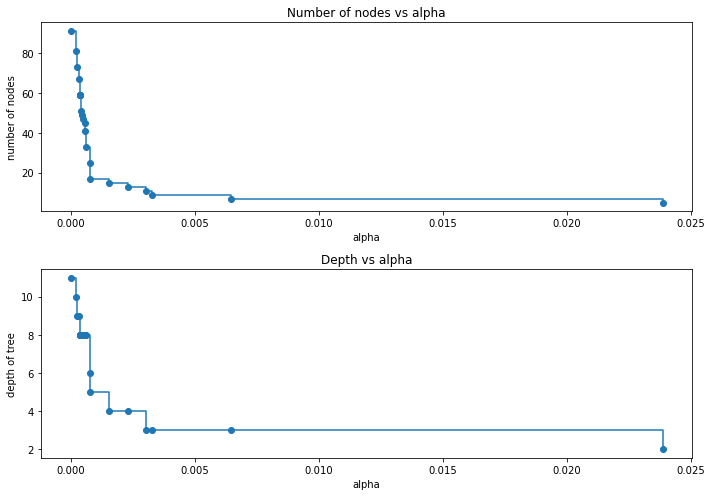

In [155]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# Accuracy vs alpha for training and testing sets

In [156]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

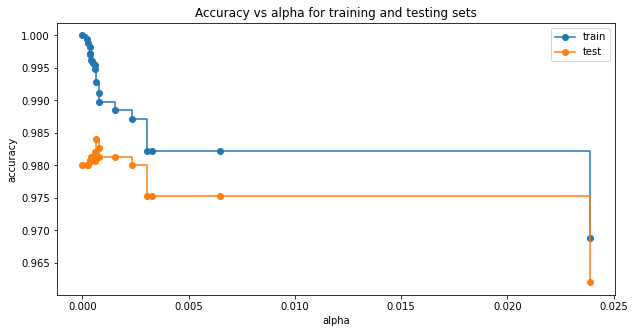

In [157]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [158]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)
Training accuracy of best model:  0.9928571428571429
Test accuracy of best model:  0.984


### Since accuracy isn't the right metric for our data we would want high recall

In [159]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [160]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

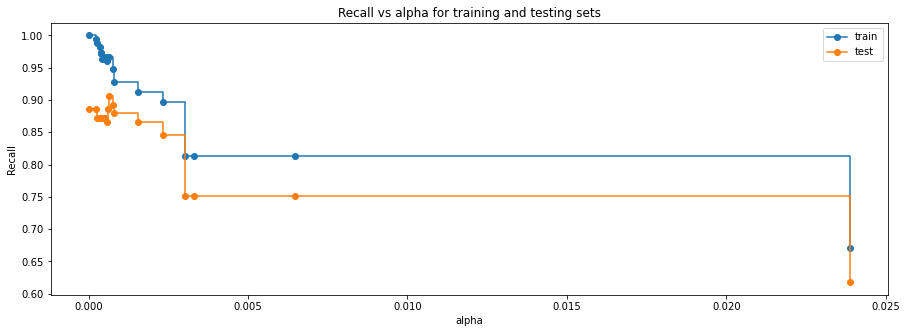

In [161]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [162]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


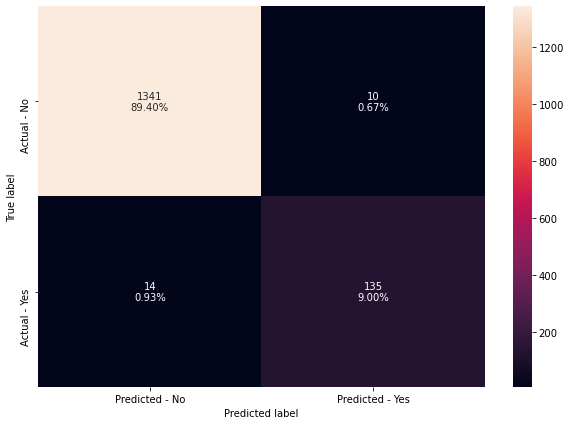

In [163]:
make_confusion_matrix(best_model,y_test)

In [164]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9667673716012085
Recall on test set :  0.9060402684563759


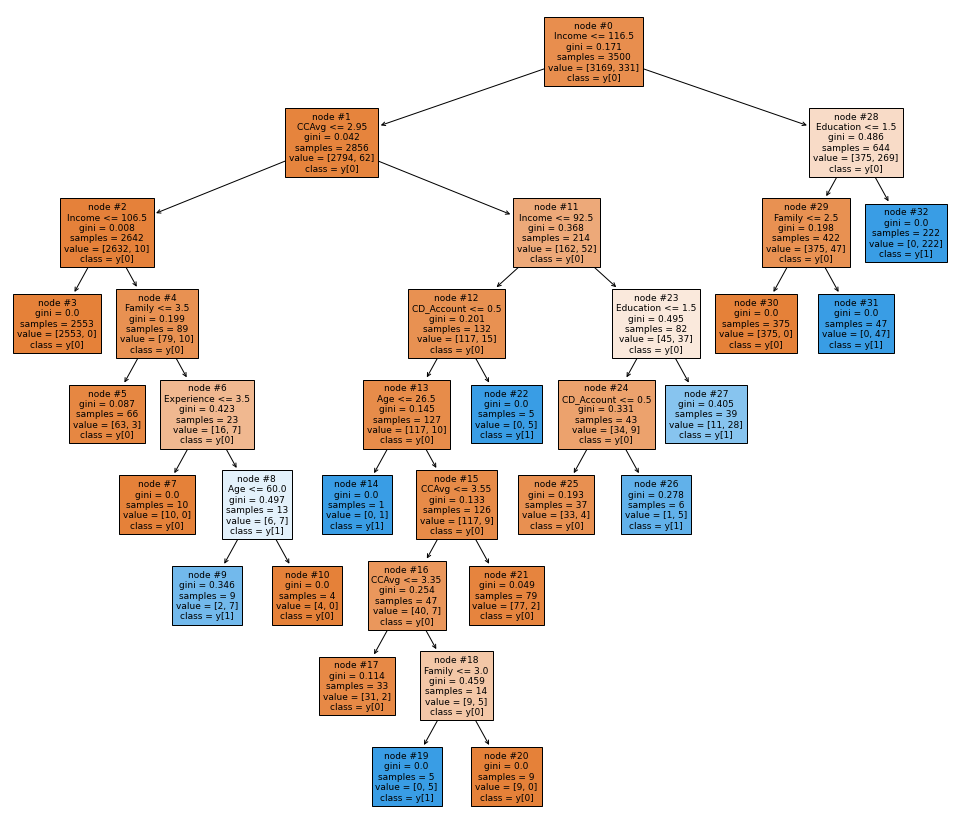

In [165]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [166]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


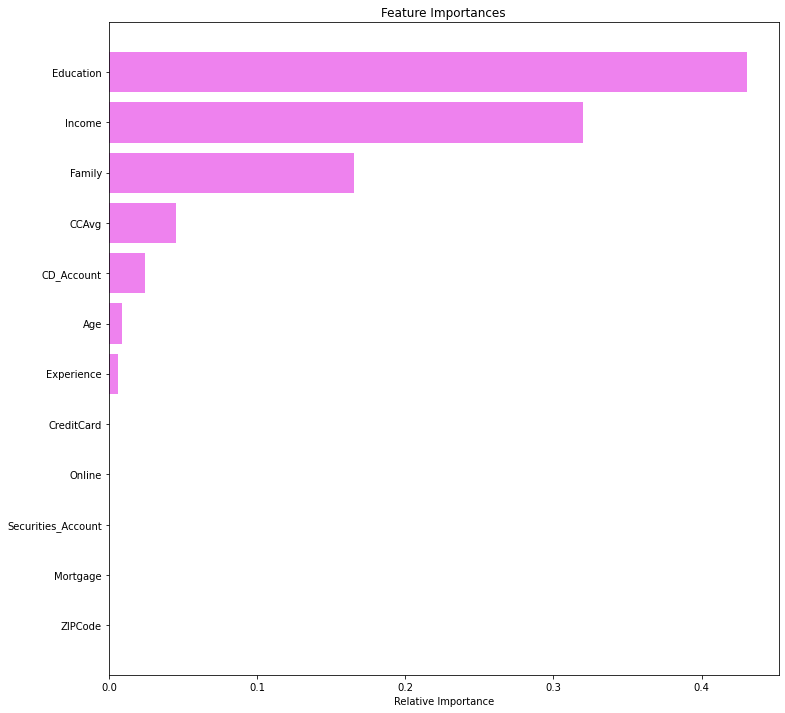

In [167]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [168]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[1,0.81,0.92,1.0], 'Test_Recall':[0.89,0.75,0.87,0.89]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model          1.00         0.89
1  Decision tree with restricted maximum depth          0.81         0.75
2    Decision treee with hyperparameter tuning          0.92         0.87
3              Decision tree with post-pruning          1.00         0.89